# Importing Necessary Libraries 

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.utils.class_weight import compute_class_weight

np.random.seed(12049)


# Function to Load Class Data 

In [50]:
def get_class_distribution(data_path, class_labels, dataset_name):
    print(f"\n---- {dataset_name.upper()} DATASET ----")
    data_summary = {}
    total_images = 0

    
    for idx, label in enumerate(class_labels):
        class_dir = os.path.join(data_path, str(idx))
        images = os.listdir(class_dir)
        data_summary[idx] = images
        total_images += len(images)

   
    for k, v in data_summary.items():
        percent = (len(v) / total_images) * 100
        print(f"Grade {k} - {class_labels[k]}: {len(v)} images ({percent:.2f}%)")

    return data_summary



# Loading the Datasets, Defining Dataset Paths, and Class Labels

In [26]:
base_dir = r"C:\Users\saich\LIU\AI_700\Knee"
train_path = os.path.join(base_dir, "train")
test_path = os.path.join(base_dir, "test")
valid_path = os.path.join(base_dir, "val")

class_names = ["Healthy", "Doubtful", "Minimal", "Moderate", "Severe"]



# Data Information 

In [51]:
train_data = get_class_distribution(train_path, class_names, "Train")
test_data = get_class_distribution(test_path, class_names, "Test")
valid_data = get_class_distribution(valid_path, class_names, "Validation")


---- TRAIN DATASET ----
Grade 0 - Healthy: 2286 images (39.56%)
Grade 1 - Doubtful: 1046 images (18.10%)
Grade 2 - Minimal: 1516 images (26.24%)
Grade 3 - Moderate: 757 images (13.10%)
Grade 4 - Severe: 173 images (2.99%)

---- TEST DATASET ----
Grade 0 - Healthy: 639 images (38.59%)
Grade 1 - Doubtful: 296 images (17.87%)
Grade 2 - Minimal: 447 images (26.99%)
Grade 3 - Moderate: 223 images (13.47%)
Grade 4 - Severe: 51 images (3.08%)

---- VALIDATION DATASET ----
Grade 0 - Healthy: 328 images (39.71%)
Grade 1 - Doubtful: 153 images (18.52%)
Grade 2 - Minimal: 212 images (25.67%)
Grade 3 - Moderate: 106 images (12.83%)
Grade 4 - Severe: 27 images (3.27%)


# Visualization of Samples from Each Set 

Train Data - Healthy


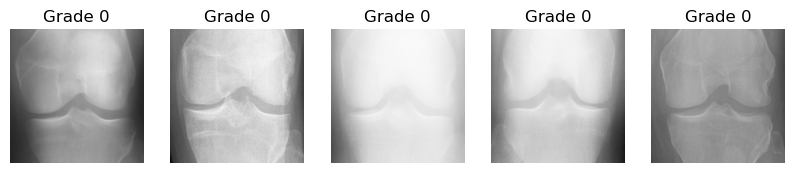

Train Data - Doubtful


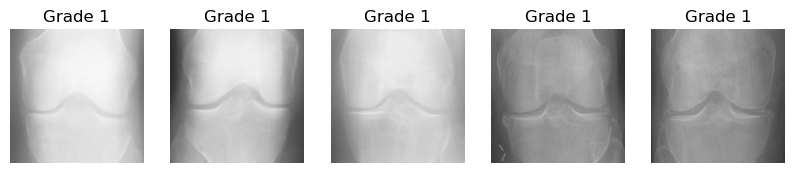

Train Data - Minimal


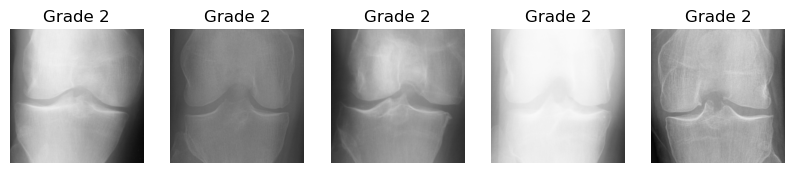

Train Data - Moderate


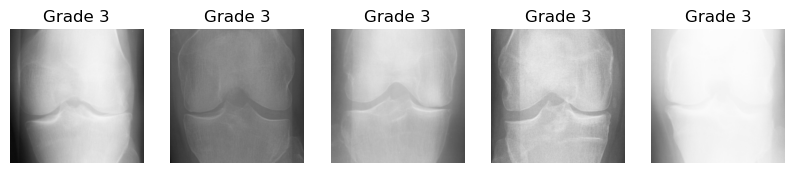

Train Data - Severe


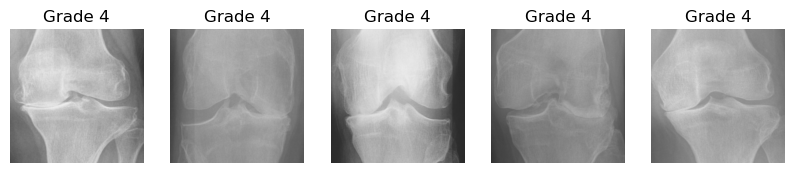

Test Data - Healthy


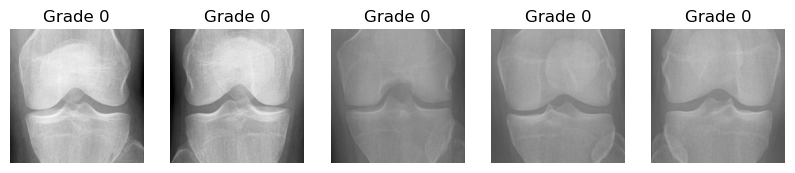

Test Data - Doubtful


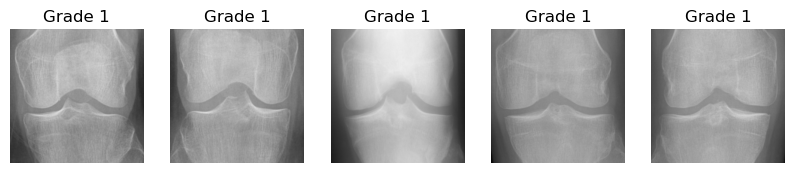

Test Data - Minimal


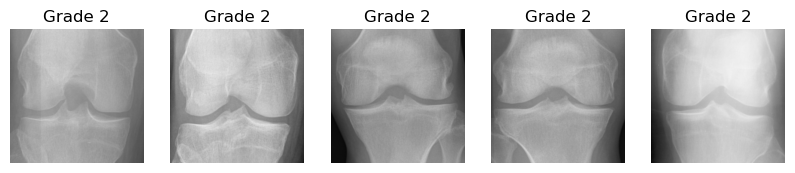

Test Data - Moderate


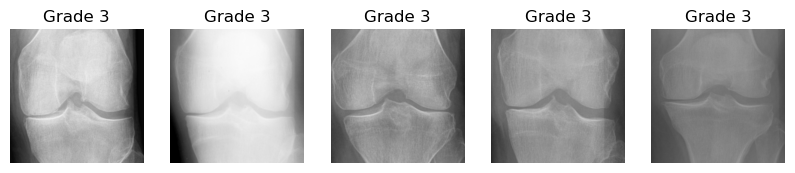

Test Data - Severe


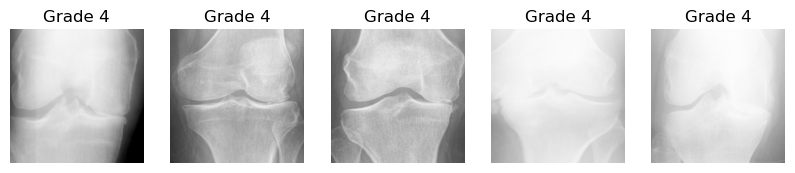

Validation Data - Healthy


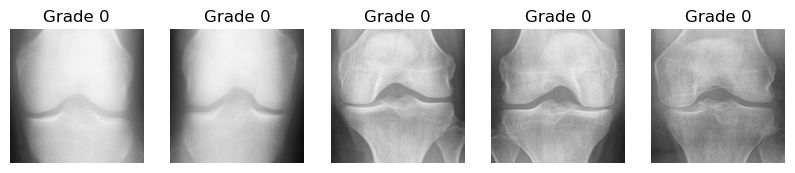

Validation Data - Doubtful


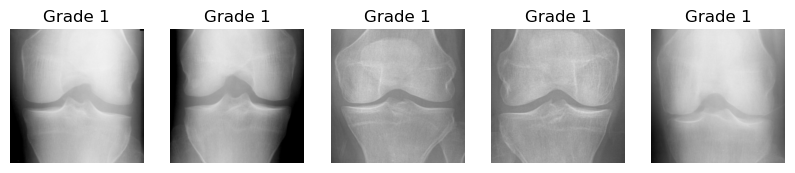

Validation Data - Minimal


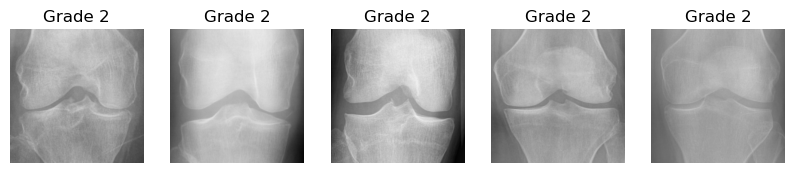

Validation Data - Moderate


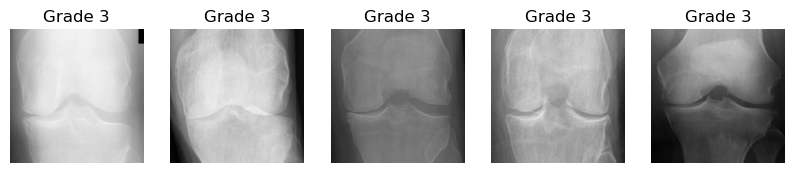

Validation Data - Severe


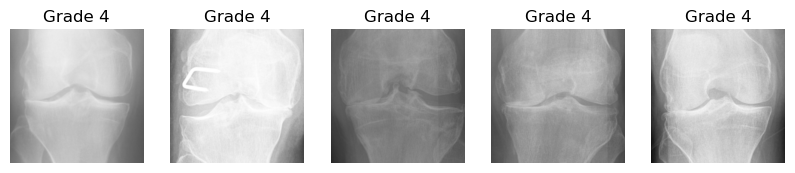

In [5]:
def visualize_samples(data_dict, data_path, class_labels, dataset_name):
    for k, v in data_dict.items():
        print(f"{dataset_name} - {class_labels[k]}")
        plt.figure(figsize=(10, 5))
        for i in range(5):
            img_path = os.path.join(data_path, str(k), v[i])
            img = tf.keras.preprocessing.image.load_img(img_path)
            plt.subplot(1, 5, i + 1)
            plt.imshow(img)
            plt.axis("off")
            plt.title(f"Grade {k}")
        plt.show()

visualize_samples(train_data, train_path, class_names, "Train Data")
visualize_samples(test_data, test_path, class_names, "Test Data")
visualize_samples(valid_data, valid_path, class_names, "Validation Data")

# Checking for Duplicates and Missing Files 

In [6]:
def check_dataset_integrity(data_dict, data_path):
    missing = []
    duplicates = []

    for k, v in data_dict.items():
        full_paths = [os.path.join(data_path, str(k), img) for img in v]

        missing_files = [img for img in full_paths if not os.path.exists(img)]
        if missing_files:
            missing.extend(missing_files)

        if len(v) != len(set(v)):
            duplicates.append(k)

    print("✅ Data Integrity Check Completed.")
    if missing:
        print(f"⚠️ Missing Files: {len(missing)}")
    if duplicates:
        print(f"⚠️ Duplicate Filenames found in classes: {duplicates}")
    if not missing and not duplicates:
        print("✅ No missing or duplicate images detected.")

check_dataset_integrity(train_data, train_path)
check_dataset_integrity(test_data, test_path)
check_dataset_integrity(valid_data, valid_path)


✅ Data Integrity Check Completed.
✅ No missing or duplicate images detected.
✅ Data Integrity Check Completed.
✅ No missing or duplicate images detected.
✅ Data Integrity Check Completed.
✅ No missing or duplicate images detected.


# Brightness Augmentation for Train, Validation, and Test Datasets

Found 5778 images belonging to 5 classes.


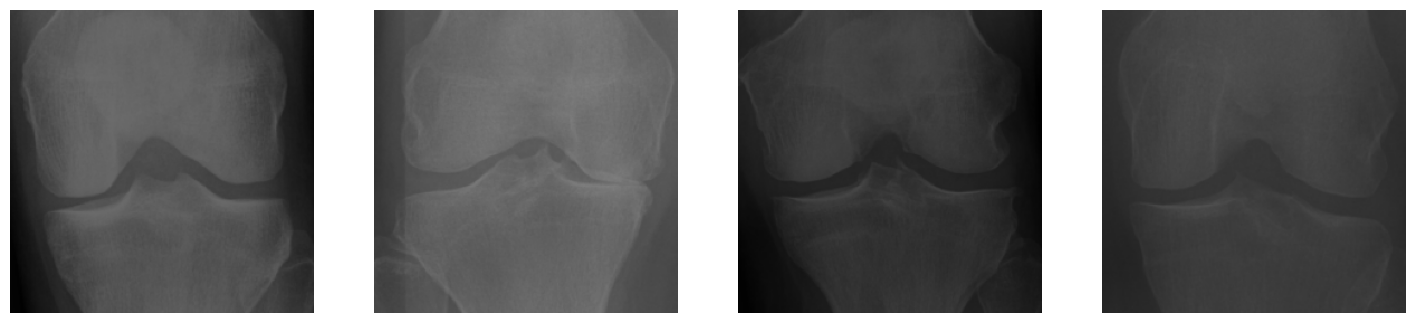

In [7]:
# Training
datagen = tf.keras.preprocessing.image.ImageDataGenerator(brightness_range=[0.3, 0.8])
imagegen = datagen.flow_from_directory(train_path, batch_size=1)

fig, axes = plt.subplots(1, 4, figsize=(18, 18))
for ax in axes:
    batch = next(imagegen)   
    img = batch[0][0].astype("uint8")
    ax.imshow(img)
    ax.axis("off")
plt.show()


Found 1656 images belonging to 5 classes.


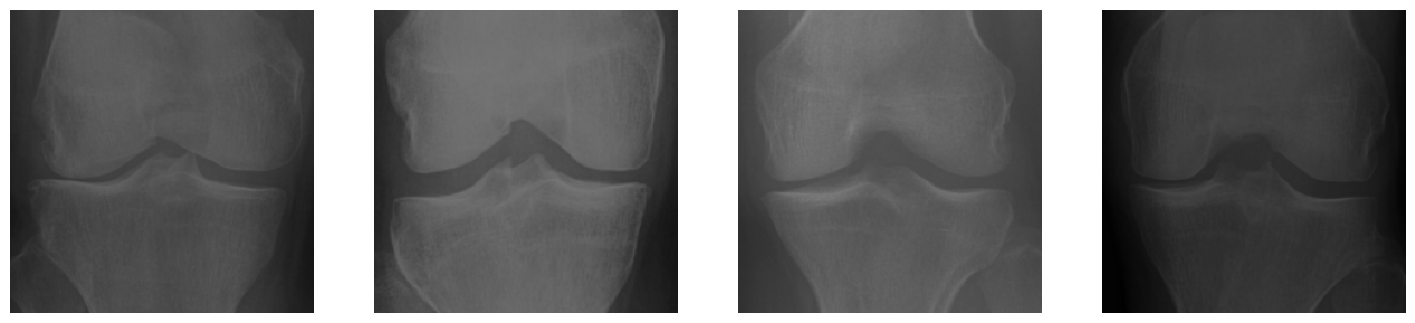

In [8]:
# Testing
datagen = tf.keras.preprocessing.image.ImageDataGenerator(brightness_range=[0.3, 0.8])
imagegen = datagen.flow_from_directory(test_path, batch_size=1)

fig, axes = plt.subplots(1, 4, figsize=(18, 18))
for ax in axes:
    batch = next(imagegen)       
    img = batch[0][0].astype("uint8")
    ax.imshow(img)
    ax.axis("off")
plt.show()


Found 826 images belonging to 5 classes.


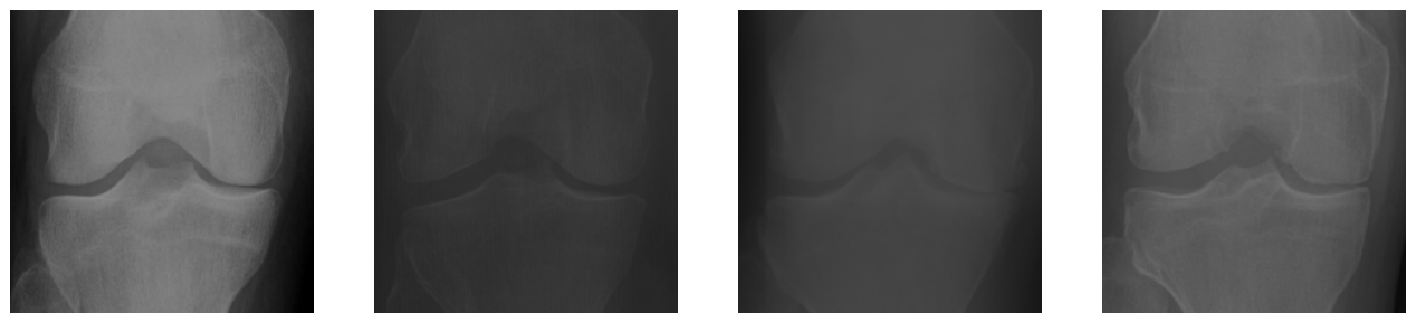

In [9]:
# Validation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(brightness_range=[0.3, 0.8])
imagegen = datagen.flow_from_directory(valid_path, batch_size=1)

fig, axes = plt.subplots(1, 4, figsize=(18, 18))
for ax in axes:
    batch = next(imagegen)      
    img = batch[0][0].astype("uint8")
    ax.imshow(img)
    ax.axis("off")
plt.show()


# Zoom Variations for Train, Validation, and Test Datasets

Found 5778 images belonging to 5 classes.


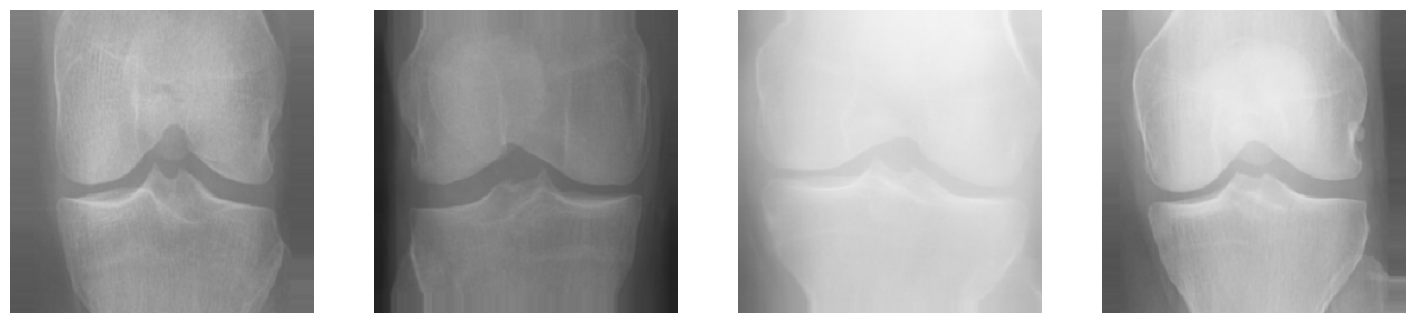

In [10]:
# Training
datagen = tf.keras.preprocessing.image.ImageDataGenerator(zoom_range=0.2)
imagegen = datagen.flow_from_directory(train_path, batch_size=1)

fig, axes = plt.subplots(1, 4, figsize=(18, 18))
for ax in axes:
    batch = next(imagegen)          
    img = batch[0][0].astype('uint8')
    ax.imshow(img)
    ax.axis('off')

plt.show()


Found 1656 images belonging to 5 classes.


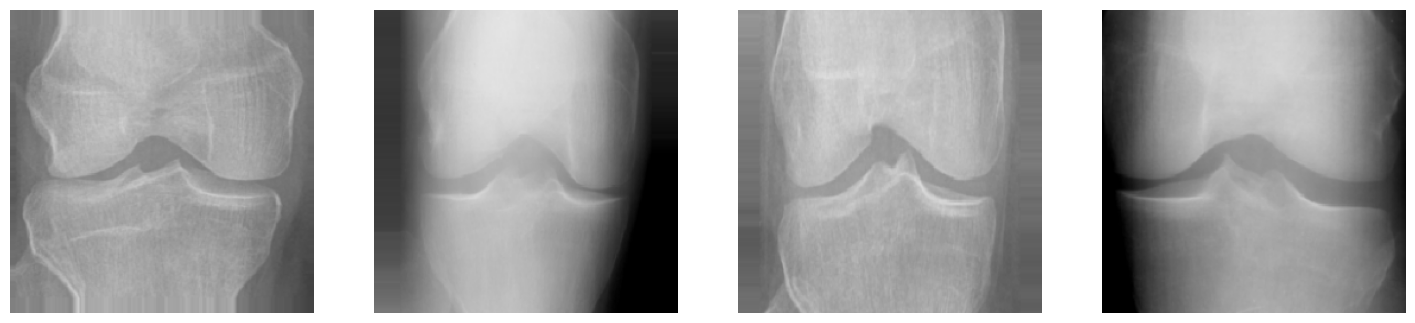

In [11]:
# Testing
datagen = tf.keras.preprocessing.image.ImageDataGenerator(zoom_range=0.2)
imagegen = datagen.flow_from_directory(test_path, batch_size=1)

fig, axes = plt.subplots(1, 4, figsize=(18, 18))
for ax in axes:
    batch = next(imagegen)          
    img = batch[0][0].astype('uint8')
    ax.imshow(img)
    ax.axis('off')

plt.show()


Found 826 images belonging to 5 classes.


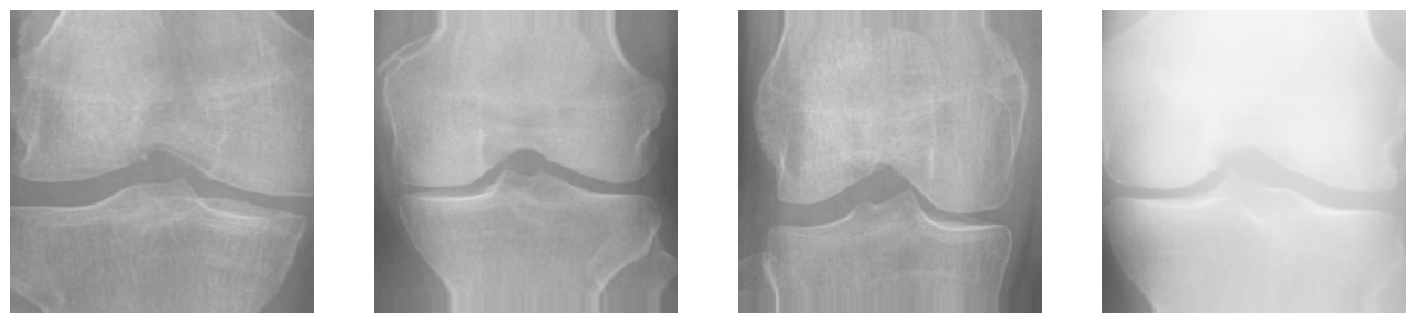

In [12]:
# Validation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(zoom_range=0.2)
imagegen = datagen.flow_from_directory(valid_path, batch_size=1)

fig, axes = plt.subplots(1, 4, figsize=(18, 18))
for ax in axes:
    batch = next(imagegen)         
    img = batch[0][0].astype('uint8')
    ax.imshow(img)
    ax.axis('off')

plt.show()


# Computing Class Weights to Handle Imbalance

In [13]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

# ---- TRAIN DATA ----
# Extract labels for each image based on dictionary keys
y_train = []
for k, v in train_data.items():
    y_train.extend([k] * len(v))
y_train = np.array(y_train)

# Compute train class distribution
unique, counts = np.unique(y_train, return_counts=True)
train_distribution = dict(zip(unique, counts))
print("---- TRAIN DATASET ----")
for k, v in train_distribution.items():
    print(f"Grade {k} - {class_names[k]}: {v} images ({v / len(y_train) * 100:.2f}%)")

# Compute class weights for imbalanced dataset
class_weights = compute_class_weight(
    class_weight="balanced", classes=np.unique(y_train), y=y_train
)
train_class_weights = dict(enumerate(class_weights))

print("\nComputed Class Weights:")
for k, v in train_class_weights.items():
    print(f"Grade {k} ({class_names[k]}): {v:.4f}")


# ---- VALIDATION DATA ----
val_distribution = {k: len(v) for k, v in valid_data.items()}
total_val = sum(val_distribution.values())
print("\n---- VALIDATION DATASET ----")
for k, v in val_distribution.items():
    print(f"Grade {k} - {class_names[k]}: {v} images ({v / total_val * 100:.2f}%)")


# ---- TEST DATA ----
test_distribution = {k: len(v) for k, v in test_data.items()}
total_test = sum(test_distribution.values())
print("\n---- TEST DATASET ----")
for k, v in test_distribution.items():
    print(f"Grade {k} - {class_names[k]}: {v} images ({v / total_test * 100:.2f}%)")


---- TRAIN DATASET ----
Grade 0 - Healthy: 2286 images (39.56%)
Grade 1 - Doubtful: 1046 images (18.10%)
Grade 2 - Minimal: 1516 images (26.24%)
Grade 3 - Moderate: 757 images (13.10%)
Grade 4 - Severe: 173 images (2.99%)

Computed Class Weights:
Grade 0 (Healthy): 0.5055
Grade 1 (Doubtful): 1.1048
Grade 2 (Minimal): 0.7623
Grade 3 (Moderate): 1.5266
Grade 4 (Severe): 6.6798

---- VALIDATION DATASET ----
Grade 0 - Healthy: 328 images (39.71%)
Grade 1 - Doubtful: 153 images (18.52%)
Grade 2 - Minimal: 212 images (25.67%)
Grade 3 - Moderate: 106 images (12.83%)
Grade 4 - Severe: 27 images (3.27%)

---- TEST DATASET ----
Grade 0 - Healthy: 639 images (38.59%)
Grade 1 - Doubtful: 296 images (17.87%)
Grade 2 - Minimal: 447 images (26.99%)
Grade 3 - Moderate: 223 images (13.47%)
Grade 4 - Severe: 51 images (3.08%)


# Visualization of Class Distribution for Each Dataset 

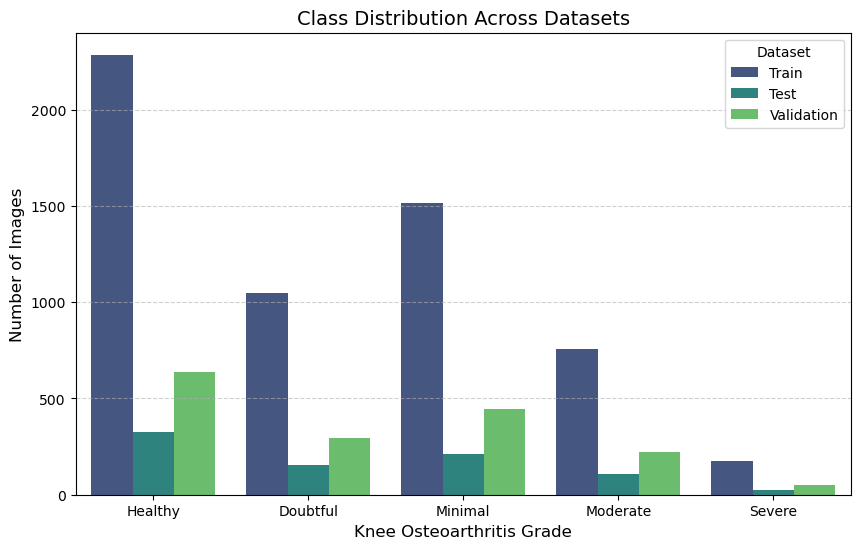

In [14]:
import pandas as pd

def plot_class_distribution(train_dict, test_dict, valid_dict, class_names):
    
    dist_data = {
        "Dataset": [],
        "Class": [],
        "Count": []
    }

    for data_name, dataset in [("Train", train_dict), ("Test", valid_dict), ("Validation", test_dict)]:
        for k, v in dataset.items():
            dist_data["Dataset"].append(data_name)
            dist_data["Class"].append(class_names[k])
            dist_data["Count"].append(len(v))

    df = pd.DataFrame(dist_data)

    plt.figure(figsize=(10, 6))
    sns.barplot(data=df, x="Class", y="Count", hue="Dataset", palette="viridis")
    plt.title("Class Distribution Across Datasets", fontsize=14)
    plt.xlabel("Knee Osteoarthritis Grade", fontsize=12)
    plt.ylabel("Number of Images", fontsize=12)
    plt.legend(title="Dataset")
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.show()


plot_class_distribution(train_data, test_data, valid_data, class_names)


# Model Ensemble

In [15]:
import os
import matplotlib.cm as cm
from sklearn.metrics import (accuracy_score, balanced_accuracy_score,
                             classification_report, confusion_matrix)




In [62]:
def get_ensemble(models, input_shape, weights=None):
    """Builds an ensemble model that averages or weights submodel outputs."""
    x = tf.keras.Input(shape=input_shape)

    # Set default equal weights if not provided
    if weights is None:
        weights = [1.0 / len(models)] * len(models)

    outputs = []
    for model, w in zip(models, weights):
        y = model(x)
        # Scale each submodel's output by its weight safely using a Keras layer
        y = tf.keras.layers.Lambda(lambda z, w=w: z * w)(y)
        outputs.append(y)

    # Sum them with a Keras Add layer (works with KerasTensors)
    y = tf.keras.layers.Add()(outputs)

    ensemble = tf.keras.Model(inputs=x, outputs=y, name="ensemble_model")
    return ensemble


def get_data():

    noaug_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        dtype=np.float32
    )

    train_generator = noaug_datagen.flow_from_directory(
        "./train/",
        class_mode="categorical",
        target_size=(224, 224),
        shuffle=False,
    )

    valid_generator = noaug_datagen.flow_from_directory(
        "./val/",
        class_mode="categorical",
        target_size=(224, 224),
        shuffle=False,
    )

    test_generator = noaug_datagen.flow_from_directory(
        "./test/",
        class_mode="categorical",
        target_size=(224, 224),
        shuffle=False,
    )

    return train_generator, valid_generator, test_generator

def get_metrics(model, data, name=None, show_results=True):
    if name is None:
        name = model.name

    y_true = data.labels
    y_pred = np.argmax(model.predict(data), axis=1)

    acc = accuracy_score(y_true, y_pred)
    bal_acc = balanced_accuracy_score(y_true, y_pred)
    
    # zero_division=0 avoids undefined metric warnings internally
    print(f"Accuracy Score - {name}: {acc}")
    print(f"Balanced Accuracy Score - {name}: {bal_acc}\n")
    print(classification_report(y_true, y_pred, zero_division=0))



def compute_confusion_matrix(
    model,
    class_names,
    data,
    name=None,
):
    y_true = data.labels
    y_pred = np.argmax(model.predict(data), axis=1)

    cm = confusion_matrix(y_true=y_true, y_pred=y_pred)
    cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

    plt.subplots(figsize=(6, 5))
    sns.heatmap(
        cm,
        annot=True,
        fmt=".2f",
        cmap="Purples",
        xticklabels=class_names,
        yticklabels=class_names,
    )
    plt.title(f"Confusion Matrix - {name}")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show(block=False)

import tensorflow as tf
import os

def embed_preproc(model_path, preproc, input_shape):
    """Loads a model and wraps it with resizing + preprocessing."""
    model = tf.keras.models.load_model(model_path)
    # detect model name to infer correct target shape
    if "Xception" in os.path.basename(model_path) or "Inception" in os.path.basename(model_path):
        target_shape = (299, 299)
    else:
        target_shape = (224, 224)

    print(f"→ Building wrapper for {os.path.basename(model_path)} | resize to {target_shape}")

    wrapped = tf.keras.models.Sequential([
        tf.keras.layers.Resizing(target_shape[0], target_shape[1], name=f"resize_{target_shape[0]}x{target_shape[1]}"),
        tf.keras.layers.Lambda(preproc),
        model
    ])
    return wrapped


def load_models(model_list, input_shape):
    """Loads and wraps all base models with preprocessing."""
    wrapped_models = []
    for path, preproc in model_list:
        wrapped_models.append(embed_preproc(path, preproc, input_shape))
    print(f"✅ Loaded {len(wrapped_models)} base models for ensemble.")
    return wrapped_models


In [37]:
import tensorflow as tf
import os

model_dir = r"C:\Users\saich\LIU\AI_700\Knee\models"
os.makedirs(model_dir, exist_ok=True)

print("============================================================")
print("🔧 Rebuilding Fine-Tuned Models for 5 Classes")
print("============================================================")

num_classes = 5
IMG_SHAPES = {
    "ResNet50": (224, 224),
    "Xception": (299, 299),
    "Inception_ResNet_V2": (299, 299)
}

for name, constructor in {
    "ResNet50": tf.keras.applications.ResNet50,
    "Xception": tf.keras.applications.Xception,
    "Inception_ResNet_V2": tf.keras.applications.InceptionResNetV2
}.items():
    print(f"\n🔄 Building {name} feature extractor...")
    base = constructor(weights="imagenet", include_top=False, input_shape=IMG_SHAPES[name] + (3,))
    base.trainable = False  # freeze base
    
    model = tf.keras.Sequential([
        base,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(num_classes, activation="softmax")
    ])

    save_path = os.path.join(model_dir, f"model_{name}_ft.keras")
    model.save(save_path)
    print(f"✅ Saved fine-tuned {name} → {save_path}")

print("\n============================================================")
print("✅ All fine-tuned 5-class models are ready.")
print("============================================================")


🔧 Rebuilding Fine-Tuned Models for 5 Classes

🔄 Building ResNet50 feature extractor...
✅ Saved fine-tuned ResNet50 → C:\Users\saich\LIU\AI_700\Knee\models\model_ResNet50_ft.keras

🔄 Building Xception feature extractor...
✅ Saved fine-tuned Xception → C:\Users\saich\LIU\AI_700\Knee\models\model_Xception_ft.keras

🔄 Building Inception_ResNet_V2 feature extractor...

✅ Saved fine-tuned Inception_ResNet_V2 → C:\Users\saich\LIU\AI_700\Knee\models\model_Inception_ResNet_V2_ft.keras

✅ All fine-tuned 5-class models are ready.


In [18]:
class_names = ["Healthy", "Doubtful", "Minimal", "Moderate", "Severe"]
model_name = "Ensemble"

# get generators
train, valid, test = get_data()
input_shape = 224, 224, 3

# load models
models = [
    [
        r"C:\Users\saich\LIU\AI_700\Knee\models\model_ResNet50_ft.keras",
        tf.keras.applications.resnet50.preprocess_input,
    ],
    [
        r"C:\Users\saich\LIU\AI_700\Knee\models\model_Xception_ft.keras",
        tf.keras.applications.xception.preprocess_input,
    ],
    [
        r"C:\Users\saich\LIU\AI_700\Knee\models\model_Inception_ResNet_V2_ft.keras",
        tf.keras.applications.inception_resnet_v2.preprocess_input,
    ],
]


models = load_models(models, input_shape)

Found 5778 images belonging to 5 classes.
Found 826 images belonging to 5 classes.
Found 1656 images belonging to 5 classes.
→ Building wrapper for model_ResNet50_ft.keras | resize to (224, 224)
→ Building wrapper for model_Xception_ft.keras | resize to (299, 299)
→ Building wrapper for model_Inception_ResNet_V2_ft.keras | resize to (299, 299)
✅ Loaded 3 base models for ensemble.


In [19]:
# model weights
def get_ensemble_weights(models, metric):
    metrics = []
    for model in models:
        report = get_metrics(model, data=train, show_results=False)
        metrics.append([report[str(i)][metric] for i in range(5)])

    metrics = np.array(metrics)
    model_weights = metrics / np.sum(metrics, axis=0)
    return model_weights

# ensemble of models

In [21]:
ensemble_mean = get_ensemble(
    models,
    input_shape=(224, 224, 3),
)

ensemble_acc = get_ensemble(
    models,
    input_shape=(224, 224, 3),
    weights=get_ensemble_weights(models, "accuracy"),
)

ensemble_f1 = get_ensemble(
    models,
    input_shape=(224, 224, 3),
    weights=get_ensemble_weights(models, "f1-score"),
)

181/181 ━━━━━━━━━━━━━━━━━━━━ 620s 3s/step
181/181 ━━━━━━━━━━━━━━━━━━━━ 1415s 8s/step
181/181 ━━━━━━━━━━━━━━━━━━━━ 1979s 11s/step
181/181 ━━━━━━━━━━━━━━━━━━━━ 610s 3s/step
181/181 ━━━━━━━━━━━━━━━━━━━━ 1348s 7s/step
181/181 ━━━━━━━━━━━━━━━━━━━━ 1874s 10s/step


In [54]:
ensemble_mean.save("models/ensemble_mean.h5")
ensemble_acc.save("models/eemblensemble_acc.h5")
ensemble_f1.save("models/ens_f1.h5")

In [63]:
get_metrics(ensemble_mean, valid, name="ensemble_mean")

26/26 ━━━━━━━━━━━━━━━━━━━━ 634s 24s/step
Accuracy Score - ensemble_mean: 0.053268765133171914
Balanced Accuracy Score - ensemble_mean: 0.17631305475096926

              precision    recall  f1-score   support

           0       0.62      0.02      0.03       328
           1       0.20      0.01      0.02       153
           2       0.20      0.08      0.11       212
           3       0.00      0.00      0.00       106
           4       0.03      0.78      0.06        27

    accuracy                           0.05       826
   macro avg       0.21      0.18      0.04       826
weighted avg       0.34      0.05      0.05       826



In [64]:
get_metrics(ensemble_acc, valid, name="ensemble_acc")

26/26 ━━━━━━━━━━━━━━━━━━━━ 646s 24s/step
Accuracy Score - ensemble_acc: 0.05084745762711865
Balanced Accuracy Score - ensemble_acc: 0.1767687613983058

              precision    recall  f1-score   support

           0       0.62      0.05      0.10       328
           1       0.00      0.00      0.00       153
           2       0.07      0.00      0.01       212
           3       1.00      0.01      0.02       106
           4       0.03      0.81      0.05        27

    accuracy                           0.05       826
   macro avg       0.34      0.18      0.04       826
weighted avg       0.39      0.05      0.05       826



In [65]:
get_metrics(ensemble_f1, valid, name="ensemble_f1")

26/26 ━━━━━━━━━━━━━━━━━━━━ 650s 25s/step
Accuracy Score - ensemble_f1: 0.12227602905569007
Balanced Accuracy Score - ensemble_f1: 0.20755594255905563

              precision    recall  f1-score   support

           0       0.56      0.20      0.30       328
           1       0.19      0.04      0.07       153
           2       0.15      0.03      0.05       212
           3       0.25      0.03      0.05       106
           4       0.03      0.74      0.06        27

    accuracy                           0.12       826
   macro avg       0.24      0.21      0.10       826
weighted avg       0.33      0.12      0.15       826



C:\Users\saich\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


52/52 ━━━━━━━━━━━━━━━━━━━━ 627s 12s/step
Accuracy Score - ensemble_f1: 0.10809178743961352
Balanced Accuracy Score - ensemble_f1: 0.2275805534310698


              precision    recall  f1-score   support

           0       0.43      0.15      0.23       639
           1       0.25      0.06      0.09       296
           2       0.18      0.04      0.07       447
           3       0.11      0.00      0.01       223
           4       0.04      0.88      0.07        51

    accuracy                           0.11      1656
   macro avg       0.20      0.23      0.09      1656
weighted avg       0.28      0.11      0.13      1656

Confusion matrix:
[[0.15 0.05 0.07 0.01 0.72]
 [0.14 0.06 0.06 0.01 0.74]
 [0.15 0.03 0.04 0.   0.77]
 [0.09 0.02 0.07 0.   0.83]
 [0.02 0.02 0.08 0.   0.88]]
Classes accuracies [0.15 0.06 0.04 0.   0.88]
52/52 ━━━━━━━━━━━━━━━━━━━━ 624s 12s/step


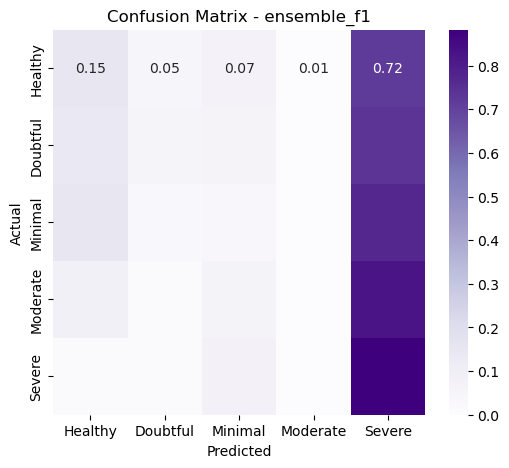

In [26]:
get_metrics(ensemble_f1, data=test, name="ensemble_f1")
compute_confusion_matrix(
    ensemble_f1, class_names, data=test, name="ensemble_f1"
)

In [27]:
y_true =test.labels
y_pred = np.argmax(ensemble_f1.predict(test), axis=1)

52/52 ━━━━━━━━━━━━━━━━━━━━ 632s 12s/step


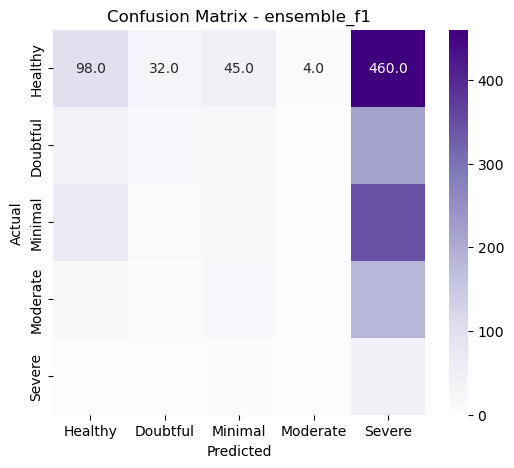

In [28]:
cm = confusion_matrix(y_true=y_true, y_pred=y_pred)

plt.subplots(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt=".1f",
    cmap="Purples",
    xticklabels=class_names,
    yticklabels=class_names,
)
plt.title(f"Confusion Matrix - ensemble_f1")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show(block=False)

# Model inception_resnet_v2

# Importing Necessary Libraries

In [2]:
import os
import timeit

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import (accuracy_score, balanced_accuracy_score,
                             classification_report, confusion_matrix)
from sklearn.utils.class_weight import compute_class_weight

In [3]:
def get_plot_loss_acc(model, model_name):
    fig = plt.figure()
    plt.subplot(2, 1, 1)
    plt.plot(model.history.history["loss"])
    plt.plot(model.history.history["val_loss"])
    plt.title(f"{model_name} \n\n model loss")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.legend(["train", "valid"], loc="upper right")

    plt.subplot(2, 1, 2)
    plt.plot(model.history.history["accuracy"])
    plt.plot(model.history.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "valid"], loc="lower right")

    plt.tight_layout()


def compute_confusion_matrix(
    ytrue, ypred, class_names, model_name
):
    cm = confusion_matrix(
        y_true=ytrue.labels,
        y_pred=np.argmax(ypred, axis=1),
    )

    cmn = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    plt.subplots(figsize=(6, 5))
    sns.heatmap(
        cmn,
        annot=True,
        fmt=".2f",
        cmap="Purples",
        xticklabels=class_names,
        yticklabels=class_names,
    )
    plt.title(f"Confusion Matrix - {model_name}")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show(block=False)


def get_evaluate(data, name, model):
    score_model = model.evaluate(data, verbose=1)
    print(f"{name} loss: {score_model[0]:.2f}")
    print(f"{name} accuracy: {score_model[1]:.2f}")


def get_predict(data, model):
    predict_model = model.predict(data)
    return predict_model


def get_metrics(y_test, y_pred, model_name):
    acc = accuracy_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)

    print(f"Accuracy Score - {model_name}: {acc:.2f}")
    print(f"Balanced Accuracy Score - {model_name}: {bal_acc:.2f}")
    print("\n")

    print(classification_report(y_test, y_pred))

In [4]:
model_name = "Inception ResNet V2"
class_names = ['Healthy', 'Doubtful', 'Minimal', 'Moderate', 'Severe']

target_size = (224, 224)
epochs = 25
batch_size = 256
img_shape = (224, 224, 3)

# Save model
save_model_ft = os.path.join('models', f'model_{model_name}_ft.hdf5')

# Image data generator

In [5]:
aug_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.inception_resnet_v2.preprocess_input,
    horizontal_flip=True,
    brightness_range=[0.3, 0.8],
    width_shift_range=[-50, 0, 50, 30, -30],
    zoom_range=0.1,
    fill_mode="nearest",
)

noaug_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.inception_resnet_v2.preprocess_input,
)

In [10]:
train_generator = aug_datagen.flow_from_directory(
    train_path, class_mode="categorical", target_size=target_size, shuffle=True
)

valid_generator = noaug_datagen.flow_from_directory(
    valid_path,
    class_mode="categorical",
    target_size=target_size,
    shuffle=False,
)

Found 5778 images belonging to 5 classes.
Found 826 images belonging to 5 classes.


In [11]:
y_train = train_generator.labels
y_val = valid_generator.labels

In [12]:
unique, counts = np.unique(y_train, return_counts=True)
print("Train: ", dict(zip(unique, counts)))

class_weights = compute_class_weight(
    class_weight="balanced", classes=np.unique(y_train), y=y_train
)
train_class_weights = dict(enumerate(class_weights))
print(train_class_weights)

Train:  {0: 2286, 1: 1046, 2: 1516, 3: 757, 4: 173}
{0: 0.5055118110236221, 1: 1.1047801147227534, 2: 0.7622691292875989, 3: 1.5265521796565389, 4: 6.679768786127168}


# Train data

In [13]:
classes = np.unique(y_train)

early = tf.keras.callbacks.EarlyStopping(
            monitor='val_loss', min_delta=0.01, patience=8,
            restore_best_weights=True
        )
plateau = tf.keras.callbacks.ReduceLROnPlateau(
                monitor='loss', factor=0.1, min_delta=0.01, 
                min_lr=1e-10, patience=4, mode='auto'
            )

In [14]:
model = tf.keras.applications.inception_resnet_v2.InceptionResNetV2(
    input_shape=(img_shape),
    include_top=False,
    weights="imagenet",
)

# Fine-Tuning

In [15]:
for layer in model.layers:
    layer.trainable = True

model_ft = tf.keras.models.Sequential(
    [
        model,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(5, activation="softmax"),
    ]
)

model_ft.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inception_resnet_v2 (Functional)     │ (None, 5, 5, 1536)          │      54,336,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1536)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1536)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │           7,685 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 54,344,421 (207.31 MB)

 Trainable params: 54,283,877 (207.08 MB)

 Non-trainable params: 60,544 (236.50 KB)

In [16]:
import gc, tensorflow as tf
tf.keras.backend.clear_session()
gc.collect()


0

In [17]:
for layer in model.layers:
    layer.trainable = True

model_ft = tf.keras.models.Sequential(
    [
        model,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(5, activation="softmax"),
    ]
)

model_ft.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inception_resnet_v2 (Functional)     │ (None, 5, 5, 1536)          │      54,336,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1536)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1536)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │           7,685 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 54,344,421 (207.31 MB)

 Trainable params: 54,283,877 (207.08 MB)

 Non-trainable params: 60,544 (236.50 KB)

In [18]:
import timeit
import numpy as np
import tensorflow as tf

model_ft.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

def add_sample_weights(generator, class_weights):
    for batch_x, batch_y in generator:
        class_indices = np.argmax(batch_y, axis=1)
        sample_weights = np.array([class_weights[c] for c in class_indices], dtype=np.float32)
        yield (batch_x, batch_y, sample_weights)

train_gen_weighted = add_sample_weights(train_generator, train_class_weights)

start_ft = timeit.default_timer()

history = model_ft.fit(
    train_gen_weighted,
    steps_per_epoch=len(train_generator),
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[early, plateau],
    validation_data=valid_generator,
    verbose=1
)


stop_ft = timeit.default_timer()

print(f"\nModel fine-tuning completed in {(stop_ft - start_ft)/60:.2f} minutes")


Epoch 1/25
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.3471 - loss: 1.4015 

C:\Users\saich\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


181/181 ━━━━━━━━━━━━━━━━━━━━ 2493s 12s/step - accuracy: 0.3474 - loss: 1.4005 - val_accuracy: 0.4952 - val_loss: 1.3417 - learning_rate: 0.0010
Epoch 2/25
181/181 ━━━━━━━━━━━━━━━━━━━━ 2208s 12s/step - accuracy: 0.5123 - loss: 0.9624 - val_accuracy: 0.5521 - val_loss: 1.0323 - learning_rate: 0.0010
Epoch 3/25
181/181 ━━━━━━━━━━━━━━━━━━━━ 2186s 12s/step - accuracy: 0.5035 - loss: 0.9457 - val_accuracy: 0.5315 - val_loss: 1.4399 - learning_rate: 0.0010
Epoch 4/25
181/181 ━━━━━━━━━━━━━━━━━━━━ 2165s 12s/step - accuracy: 0.5591 - loss: 0.8169 - val_accuracy: 0.4782 - val_loss: 1.3883 - learning_rate: 0.0010
Epoch 5/25
181/181 ━━━━━━━━━━━━━━━━━━━━ 2160s 12s/step - accuracy: 0.5831 - loss: 0.8290 - val_accuracy: 0.5133 - val_loss: 1.1765 - learning_rate: 0.0010
Epoch 6/25
181/181 ━━━━━━━━━━━━━━━━━━━━ 2148s 12s/step - accuracy: 0.6042 - loss: 0.7911 - val_accuracy: 0.5569 - val_loss: 1.1251 - learning_rate: 0.0010
Epoch 7/25
181/181 ━━━━━━━━━━━━━━━━━━━━ 2129s 12s/step - accuracy: 0.5977 - loss:

In [19]:
execution_time_ft = (stop_ft - start_ft) / 60
print(
    f"Model {model_name} fine tuning executed in {execution_time_ft:.2f} minutes"
)

Model Inception ResNet V2 fine tuning executed in 1354.07 minutes


In [20]:
model_ft.save(save_model_ft)

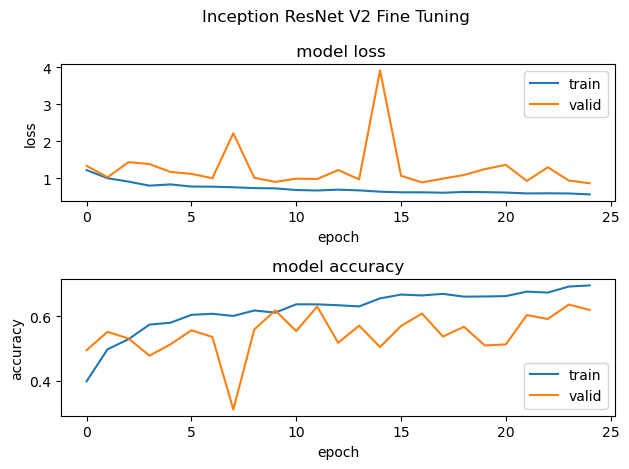

In [21]:
get_plot_loss_acc(model_ft, f"{model_name} Fine Tuning")

In [22]:
get_evaluate(valid_generator, "Valid", model_ft)

26/26 ━━━━━━━━━━━━━━━━━━━━ 138s 5s/step - accuracy: 0.6260 - loss: 0.8239
Valid loss: 0.87
Valid accuracy: 0.62


In [23]:
predict_model_ft = get_predict(valid_generator, model_ft)

get_metrics(
    valid_generator.labels,
    y_pred=np.argmax(predict_model_ft, axis=1),
    model_name=model_name,
)

26/26 ━━━━━━━━━━━━━━━━━━━━ 201s 7s/step
Accuracy Score - Inception ResNet V2: 0.62
Balanced Accuracy Score - Inception ResNet V2: 0.66


              precision    recall  f1-score   support

           0       0.73      0.70      0.72       328
           1       0.33      0.42      0.37       153
           2       0.69      0.56      0.62       212
           3       0.72      0.69      0.70       106
           4       0.62      0.93      0.75        27

    accuracy                           0.62       826
   macro avg       0.62      0.66      0.63       826
weighted avg       0.64      0.62      0.63       826



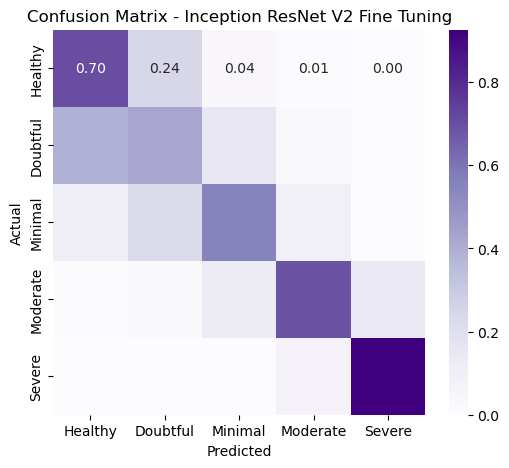

In [27]:
compute_confusion_matrix(
    valid_generator, predict_model_ft, class_names, f"{model_name} Fine Tuning"
)

# Model ResNet50

# Importing Necessary Libraries

In [1]:
import os
import timeit

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import (accuracy_score, balanced_accuracy_score,
                             classification_report, confusion_matrix)
from sklearn.utils.class_weight import compute_class_weight

In [2]:
np.random.seed(12049)

In [3]:
def get_plot_loss_acc(model, model_name):
    fig = plt.figure()
    plt.subplot(2, 1, 1)
    plt.plot(model.history.history["loss"])
    plt.plot(model.history.history["val_loss"])
    plt.title(f"{model_name} \n\n model loss")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.legend(["train", "valid"], loc="upper right")

    plt.subplot(2, 1, 2)
    plt.plot(model.history.history["accuracy"])
    plt.plot(model.history.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "valid"], loc="lower right")

    plt.tight_layout()


def compute_confusion_matrix(
    ytrue, ypred, class_names, model_name
):
    cm = confusion_matrix(
        y_true=ytrue.labels,
        y_pred=np.argmax(ypred, axis=1),
    )

    cmn = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    plt.subplots(figsize=(6, 5))
    sns.heatmap(
        cmn,
        annot=True,
        fmt=".2f",
        cmap="Purples",
        xticklabels=class_names,
        yticklabels=class_names,
    )
    plt.title(f"Confusion Matrix - {model_name}")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show(block=False)


def get_evaluate(data, name, model):
    score_model = model.evaluate(data, verbose=1)
    print(f"{name} loss: {score_model[0]:.2f}")
    print(f"{name} accuracy: {score_model[1]:.2f}")


def get_predict(data, model):
    predict_model = model.predict(data)
    return predict_model

def get_metrics(y_test, y_pred, model_name):
    acc = accuracy_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)

    print(f"Accuracy Score - {model_name}: {acc:.2f}")
    print(f"Balanced Accuracy Score - {model_name}: {bal_acc:.2f}")
    print("\n")

    print(classification_report(y_test, y_pred))

In [4]:
base_dir = r"C:\Users\saich\LIU\AI_700\Knee"
train_path = os.path.join(base_dir, "train")
test_path = os.path.join(base_dir, "test")
valid_path = os.path.join(base_dir, "val")

class_names = ["Healthy", "Doubtful", "Minimal", "Moderate", "Severe"]


In [5]:
model_name = "ResNet50"
class_names = ['Healthy', 'Doubtful', 'Minimal', 'Moderate', 'Severe']

target_size = (224, 224)
epochs = 100
batch_size = 256
img_shape = (224, 224, 3)

# Save model
save_model_ft = os.path.join('models', f'model_{model_name}_ft.hdf5')

# Image data generator

In [6]:
aug_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
    horizontal_flip=True,
    brightness_range=[0.3, 0.8],
    width_shift_range=[-50, 0, 50, 30, -30],
    zoom_range=0.1,
    fill_mode="nearest",
)

noaug_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
)

In [7]:
train_generator = aug_datagen.flow_from_directory(
    train_path, class_mode="categorical", target_size=target_size, shuffle=True
)

valid_generator = noaug_datagen.flow_from_directory(
    valid_path,
    class_mode="categorical",
    target_size=target_size,
    shuffle=False,
)

Found 5778 images belonging to 5 classes.
Found 826 images belonging to 5 classes.


In [8]:
y_train = train_generator.labels
y_val = valid_generator.labels

In [9]:
unique, counts = np.unique(y_train, return_counts=True)
print("Train: ", dict(zip(unique, counts)))

class_weights = compute_class_weight(
    class_weight="balanced", classes=np.unique(y_train), y=y_train
)
train_class_weights = dict(enumerate(class_weights))
print(train_class_weights)

Train:  {0: 2286, 1: 1046, 2: 1516, 3: 757, 4: 173}
{0: 0.5055118110236221, 1: 1.1047801147227534, 2: 0.7622691292875989, 3: 1.5265521796565389, 4: 6.679768786127168}


# Train data

In [10]:
classes = np.unique(y_train)

# Callbacks
early = tf.keras.callbacks.EarlyStopping(
            monitor='val_loss', min_delta=0.01, patience=8,
            restore_best_weights=True
        )
plateau = tf.keras.callbacks.ReduceLROnPlateau(
                monitor='loss', factor=0.1, min_delta=0.01, 
                min_lr=1e-10, patience=4, mode='auto'
            )

In [11]:
model = tf.keras.applications.ResNet50(
    input_shape=(img_shape),
    include_top=False,
    weights="imagenet",
)

# Fine-Tuning

In [12]:
for layer in model.layers:
    layer.trainable = True

model_ft = tf.keras.models.Sequential(
    [
        model,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(5, activation="softmax"),
    ]
)

model_ft.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │          10,245 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,597,957 (90.02 MB)

 Trainable params: 23,544,837 (89.82 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [15]:
import timeit
import numpy as np
import tensorflow as tf

model_ft.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

def add_sample_weights(generator, class_weights):
    for batch_x, batch_y in generator:
        class_indices = np.argmax(batch_y, axis=1)
        sample_weights = np.array([class_weights[c] for c in class_indices], dtype=np.float32)
        yield (batch_x, batch_y, sample_weights)

train_gen_weighted = add_sample_weights(train_generator, train_class_weights)

start_ft = timeit.default_timer()

history = model_ft.fit(
    train_gen_weighted,
    steps_per_epoch=len(train_generator),
    epochs=25,
    callbacks=[early, plateau],
    validation_data=valid_generator,
    verbose=1
)

stop_ft = timeit.default_timer()

print(f"\nModel fine-tuning completed in {(stop_ft - start_ft)/60:.2f} minutes")


Epoch 1/25
181/181 ━━━━━━━━━━━━━━━━━━━━ 2138s 11s/step - accuracy: 0.2375 - loss: 1.8467 - val_accuracy: 0.1283 - val_loss: 25822.0527 - learning_rate: 0.0010
Epoch 2/25
181/181 ━━━━━━━━━━━━━━━━━━━━ 1546s 9s/step - accuracy: 0.0756 - loss: 1.7445 - val_accuracy: 0.1392 - val_loss: 4.4979 - learning_rate: 0.0010
Epoch 3/25
181/181 ━━━━━━━━━━━━━━━━━━━━ 1555s 9s/step - accuracy: 0.1149 - loss: 1.7261 - val_accuracy: 0.0654 - val_loss: 3.1599 - learning_rate: 0.0010
Epoch 4/25
181/181 ━━━━━━━━━━━━━━━━━━━━ 1519s 8s/step - accuracy: 0.1313 - loss: 1.6550 - val_accuracy: 0.0763 - val_loss: 1.6149 - learning_rate: 0.0010
Epoch 5/25
181/181 ━━━━━━━━━━━━━━━━━━━━ 1496s 8s/step - accuracy: 0.1861 - loss: 1.8447 - val_accuracy: 0.3571 - val_loss: 602.6988 - learning_rate: 0.0010
Epoch 6/25
181/181 ━━━━━━━━━━━━━━━━━━━━ 1501s 8s/step - accuracy: 0.1336 - loss: 1.7547 - val_accuracy: 0.0847 - val_loss: 2.0571 - learning_rate: 0.0010
Epoch 7/25
181/181 ━━━━━━━━━━━━━━━━━━━━ 1496s 8s/step - accuracy: 0.2

In [16]:
execution_time_ft = (stop_ft - start_ft) / 60
print(
    f"Model {model_name} fine tuning executed in {execution_time_ft:.2f} minutes"
)

Model ResNet50 fine tuning executed in 551.78 minutes


In [17]:
model_ft.save(save_model_ft)

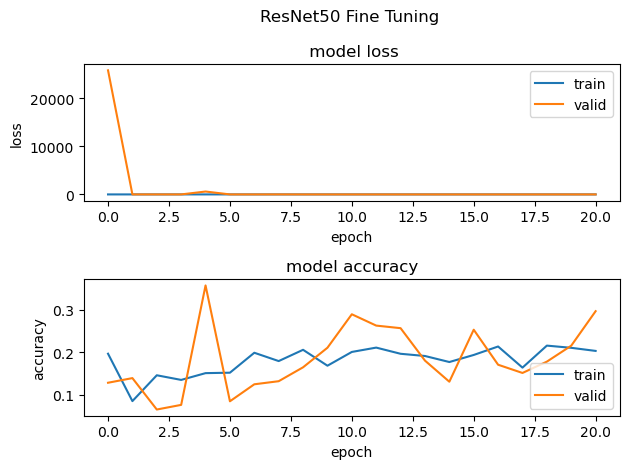

In [18]:
get_plot_loss_acc(model_ft, f"{model_name} Fine Tuning")

In [19]:
get_evaluate(valid_generator, "Valid", model_ft)

26/26 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.3159 - loss: 1.5269
Valid loss: 1.56
Valid accuracy: 0.26


In [20]:
predict_model_ft = get_predict(valid_generator, model_ft)

get_metrics(
    valid_generator.labels,
    y_pred=np.argmax(predict_model_ft, axis=1),
    model_name=model_name,
)

26/26 ━━━━━━━━━━━━━━━━━━━━ 114s 4s/step
Accuracy Score - ResNet50: 0.26
Balanced Accuracy Score - ResNet50: 0.24


              precision    recall  f1-score   support

           0       0.42      0.38      0.40       328
           1       0.00      0.00      0.00       153
           2       0.31      0.16      0.21       212
           3       0.14      0.47      0.22       106
           4       0.07      0.19      0.10        27

    accuracy                           0.26       826
   macro avg       0.19      0.24      0.18       826
weighted avg       0.27      0.26      0.24       826



C:\Users\saich\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\saich\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\saich\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


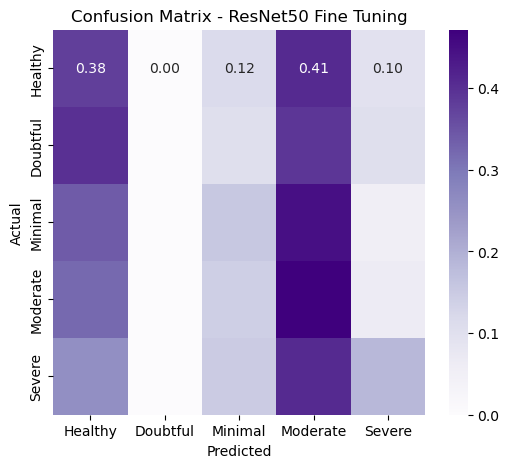

In [21]:
compute_confusion_matrix(
    valid_generator, predict_model_ft, class_names, f"{model_name} Fine Tuning"
)

# Model Xception
# Importing Necessary Libraries

In [1]:
import os
import timeit

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import (accuracy_score, balanced_accuracy_score,
                             classification_report, confusion_matrix)
from sklearn.utils.class_weight import compute_class_weight

In [119]:
np.random.seed(12049)

In [120]:
def get_plot_loss_acc(model, model_name):
    fig = plt.figure()
    plt.subplot(2, 1, 1)
    plt.plot(model.history.history["loss"])
    plt.plot(model.history.history["val_loss"])
    plt.title(f"{model_name} \n\n model loss")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.legend(["train", "valid"], loc="upper right")

    plt.subplot(2, 1, 2)
    plt.plot(model.history.history["accuracy"])
    plt.plot(model.history.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "valid"], loc="lower right")

    plt.tight_layout()


def compute_confusion_matrix(
    ytrue, ypred, class_names, model_name
):
    cm = confusion_matrix(
        y_true=ytrue.labels,
        y_pred=np.argmax(ypred, axis=1),
    )


    cmn = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    plt.subplots(figsize=(6, 5))
    sns.heatmap(
        cmn,
        annot=True,
        fmt=".2f",
        cmap="Purples",
        xticklabels=class_names,
        yticklabels=class_names,
    )
    plt.title(f"Confusion Matrix - {model_name}")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show(block=False)


def get_evaluate(data, name, model):
    score_model = model.evaluate(data, verbose=1)
    print(f"{name} loss: {score_model[0]:.2f}")
    print(f"{name} accuracy: {score_model[1]:.2f}")


def get_predict(data, model):
    predict_model = model.predict(data)
    return predict_model



def get_metrics(y_test, y_pred, model_name):
    acc = accuracy_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)

    print(f"Accuracy Score - {model_name}: {acc:.2f}")
    print(f"Balanced Accuracy Score - {model_name}: {bal_acc:.2f}")
    print("\n")

    print(classification_report(y_test, y_pred))

In [141]:
def get_plot_loss_acc(history, model_name):
    fig = plt.figure()
    plt.subplot(2, 1, 1)
    plt.plot(history["loss"])
    plt.plot(history["val_loss"])
    plt.title(f"{model_name} \n\n model loss")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.legend(["train", "valid"], loc="upper right")

    plt.subplot(2, 1, 2)
    plt.plot(history["accuracy"])
    plt.plot(history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "valid"], loc="lower right")

    plt.tight_layout()


In [121]:
model_name = "Xception"
class_names = ['Healthy', 'Doubtful', 'Minimal', 'Moderate', 'Severe']

target_size = (224, 224)
epochs = 100
batch_size = 256
img_shape = (224, 224, 3)

# Save model
save_model_ft = os.path.join('models', f'model_{model_name}_ft.hdf5')

# Image data generator

In [122]:
aug_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.xception.preprocess_input,
    horizontal_flip=True,
    brightness_range=[0.3, 0.8],
    width_shift_range=[-50, 0, 50, 30, -30],
    zoom_range=0.1,
    fill_mode="nearest",
)

noaug_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.xception.preprocess_input,
)

In [123]:
train_generator = aug_datagen.flow_from_directory(
    train_path, class_mode="categorical", target_size=target_size, shuffle=True
)

valid_generator = noaug_datagen.flow_from_directory(
    valid_path,
    class_mode="categorical",
    target_size=target_size,
    shuffle=False,
)

Found 5778 images belonging to 5 classes.
Found 826 images belonging to 5 classes.


In [124]:
y_train = train_generator.labels
y_val = valid_generator.labels

In [125]:
unique, counts = np.unique(y_train, return_counts=True)
print("Train: ", dict(zip(unique, counts)))

class_weights = compute_class_weight(
    class_weight="balanced", classes=np.unique(y_train), y=y_train
)
train_class_weights = dict(enumerate(class_weights))
print(train_class_weights)

Train:  {0: 2286, 1: 1046, 2: 1516, 3: 757, 4: 173}
{0: 0.5055118110236221, 1: 1.1047801147227534, 2: 0.7622691292875989, 3: 1.5265521796565389, 4: 6.679768786127168}


# Train Data

In [126]:
classes = np.unique(y_train)

# Callbacks
early = tf.keras.callbacks.EarlyStopping(
            monitor='val_loss', min_delta=0.01, patience=8,
            restore_best_weights=True
        )
plateau = tf.keras.callbacks.ReduceLROnPlateau(
                monitor='loss', factor=0.1, min_delta=0.01, 
                min_lr=1e-10, patience=4, mode='auto'
            )

In [127]:
model = tf.keras.applications.xception.Xception(
    input_shape=(img_shape),
    include_top=False,
    weights="imagenet",
)

# Fine-Tuning

In [128]:
for layer in model.layers:
    layer.trainable = True

model_ft = tf.keras.models.Sequential(
    [
        model,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(5, activation="softmax"),
    ]
)

model_ft.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ xception (Functional)                │ (None, 7, 7, 2048)          │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_5           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5)                   │          10,245 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,871,725 (79.62 MB)

 Trainable params: 20,817,197 (79.41 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [137]:
import timeit
import numpy as np
import tensorflow as tf

model_ft.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

def add_sample_weights(generator, class_weights):
    for batch_x, batch_y in generator:
        class_indices = np.argmax(batch_y, axis=1)
        sample_weights = np.array([class_weights[c] for c in class_indices], dtype=np.float32)
        yield (batch_x, batch_y, sample_weights)

train_gen_weighted = add_sample_weights(train_generator, train_class_weights)

start_ft = timeit.default_timer()

history = model_ft.fit(
    train_gen_weighted,
    steps_per_epoch=len(train_generator),
    epochs=25,
    callbacks=[early, plateau],
    validation_data=valid_generator,
    verbose=1
)

stop_ft = timeit.default_timer()

print(f"\nModel fine-tuning completed in {(stop_ft - start_ft)/60:.2f} minutes")


Epoch 1/25
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.3098 - loss: 1.4866 

C:\Users\saich\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


181/181 ━━━━━━━━━━━━━━━━━━━━ 2534s 13s/step - accuracy: 0.3100 - loss: 1.4857 - val_accuracy: 0.4177 - val_loss: 7.5767 - learning_rate: 0.0010
Epoch 2/25
181/181 ━━━━━━━━━━━━━━━━━━━━ 1967s 11s/step - accuracy: 0.4843 - loss: 1.0294 - val_accuracy: 0.5363 - val_loss: 1.2568 - learning_rate: 0.0010
Epoch 3/25
181/181 ━━━━━━━━━━━━━━━━━━━━ 1950s 11s/step - accuracy: 0.5284 - loss: 0.9323 - val_accuracy: 0.4237 - val_loss: 1.2802 - learning_rate: 0.0010
Epoch 4/25
181/181 ━━━━━━━━━━━━━━━━━━━━ 1921s 11s/step - accuracy: 0.5117 - loss: 0.9725 - val_accuracy: 0.5000 - val_loss: 1.2316 - learning_rate: 0.0010
Epoch 5/25
181/181 ━━━━━━━━━━━━━━━━━━━━ 1919s 11s/step - accuracy: 0.5896 - loss: 0.7852 - val_accuracy: 0.5036 - val_loss: 1.5024 - learning_rate: 0.0010
Epoch 6/25
181/181 ━━━━━━━━━━━━━━━━━━━━ 1925s 11s/step - accuracy: 0.5953 - loss: 0.8375 - val_accuracy: 0.5738 - val_loss: 0.9948 - learning_rate: 0.0010
Epoch 7/25
181/181 ━━━━━━━━━━━━━━━━━━━━ 1920s 11s/step - accuracy: 0.6246 - loss:

In [138]:
execution_time_ft = (stop_ft - start_ft) / 60
print(
    f"Model {model_name} fine tuning executed in {execution_time_ft:.2f} minutes"
)

Model Xception fine tuning executed in 736.09 minutes


In [139]:
model_ft.save(save_model_ft)

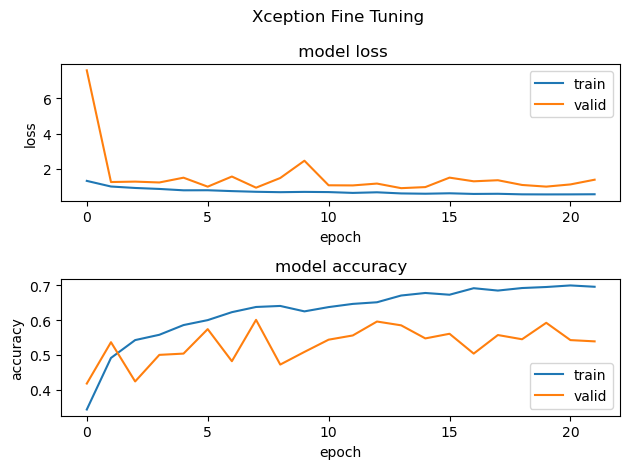

In [143]:
get_plot_loss_acc(history.history, "Xception Fine Tuning")


In [144]:
get_evaluate(valid_generator, "Valid", model_ft)

26/26 ━━━━━━━━━━━━━━━━━━━━ 116s 4s/step - accuracy: 0.5959 - loss: 0.8995
Valid loss: 0.91
Valid accuracy: 0.58


In [145]:
predict_model_ft = get_predict(valid_generator, model_ft)

get_metrics(
    valid_generator.labels,
    y_pred=np.argmax(predict_model_ft, axis=1),
    model_name=model_name,
)

26/26 ━━━━━━━━━━━━━━━━━━━━ 122s 4s/step
Accuracy Score - Xception: 0.58
Balanced Accuracy Score - Xception: 0.64


              precision    recall  f1-score   support

           0       0.72      0.66      0.69       328
           1       0.29      0.41      0.34       153
           2       0.68      0.47      0.56       212
           3       0.59      0.75      0.66       106
           4       0.76      0.93      0.83        27

    accuracy                           0.58       826
   macro avg       0.61      0.64      0.62       826
weighted avg       0.62      0.58      0.59       826



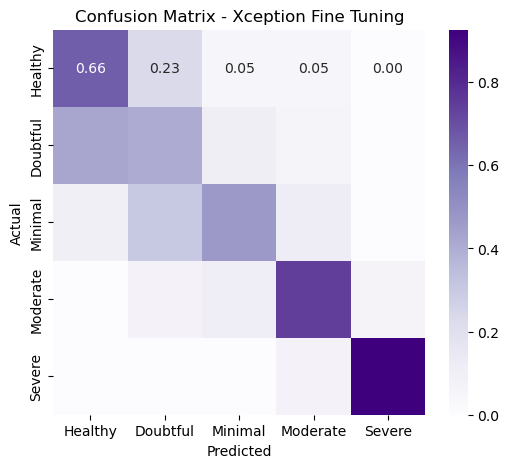

In [146]:
compute_confusion_matrix(
    valid_generator, predict_model_ft, class_names, f"{model_name} Fine Tuning"
)

# Importing Necessary Libraries

In [4]:
import os

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import (accuracy_score, balanced_accuracy_score,
                             classification_report, confusion_matrix)

In [148]:
np.random.seed(12049)

In [149]:
def get_classes(data_path, classes, data):
    print(f"---- {data} ----")
    knee_severity = {}
    count = 0

    for i in range(len(classes)):
        imgs = os.listdir(os.path.join(data_path, str(i)))
        knee_severity[i] = imgs
        count += len(imgs)

    for k, v in knee_severity.items():
        print(
            f"Grade {k} - {classes[k]}: {len(v)} images, {round((len(v) * 100) / count, 2)}%"
        )

    return knee_severity


def compute_confusion_matrix(
    predictions, valid_generator, class_names, model_name
):
    cm = confusion_matrix(
        y_true=valid_generator.labels,
        y_pred=np.argmax(predictions, axis=1),
    )


    cmn = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    plt.subplots(figsize=(6, 5))
    sns.heatmap(
        cmn,
        annot=True,
        fmt=".2f",
        cmap="Purples",
        xticklabels=class_names,
        yticklabels=class_names,
    )
    plt.title(f"Confusion Matrix - {model_name}")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show(block=False)


def get_metrics(y_test, y_pred, model_name):
    acc = accuracy_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)

    print(f"Accuracy Score - {model_name}: {acc:.2f}")
    print(f"Balanced Accuracy Score - {model_name}: {bal_acc:.2f}")
    print("\n")

    print(classification_report(y_test, y_pred))

def make_gradcam_heatmap(grad_model, img_array, pred_index=None):
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)

    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def save_and_display_gradcam(img, heatmap, alpha=0.4):
    heatmap = np.uint8(255 * heatmap)

    jet = cm.get_cmap("jet")

    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)

    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = tf.keras.preprocessing.image.array_to_img(
        superimposed_img
    )

    return superimposed_img




In [150]:
base_dir = r"C:\Users\saich\LIU\AI_700\Knee"
train_path = os.path.join(base_dir, "train")
test_path = os.path.join(base_dir, "test")
valid_path = os.path.join(base_dir, "val")

class_names = ["Healthy", "Doubtful", "Minimal", "Moderate", "Severe"]


# Image data generator

In [151]:
model_name = "Xception"
batch_size = 256
target_size = (224, 224)

In [152]:
aug_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.xception.preprocess_input,
    horizontal_flip=True,
    brightness_range=[0.3, 0.8],
    width_shift_range=[-50, 0, 50, 30, -30],
    zoom_range=0.1,
    fill_mode="nearest",
)

noaug_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.xception.preprocess_input
)

In [153]:
test_generator = noaug_datagen.flow_from_directory(
    test_path,
    batch_size=batch_size,
    class_mode="categorical",
    target_size=target_size,
    shuffle=False,
)

Found 1656 images belonging to 5 classes.


In [154]:
y_test = test_generator.labels

In [155]:
xception = tf.keras.models.load_model('models/model_Xception_ft.hdf5')

# Test data

In [156]:
predictions_xception = xception.predict(test_generator)
score_xception = xception.evaluate(test_generator, verbose=1)
print('Test loss:', score_xception[0])
print('Test acc:', score_xception[1])

C:\Users\saich\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 262s 34s/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 228s 31s/step - accuracy: 0.6278 - loss: 0.8170
Test loss: 0.8368735313415527
Test acc: 0.6062802076339722


In [157]:
get_metrics(
    test_generator.labels,
    y_pred=np.argmax(predictions_xception, axis=1),
    model_name=model_name,
)

Accuracy Score - Xception: 0.61
Balanced Accuracy Score - Xception: 0.66


              precision    recall  f1-score   support

           0       0.76      0.70      0.73       639
           1       0.29      0.41      0.34       296
           2       0.68      0.46      0.55       447
           3       0.66      0.82      0.73       223
           4       0.71      0.88      0.79        51

    accuracy                           0.61      1656
   macro avg       0.62      0.66      0.63      1656
weighted avg       0.64      0.61      0.61      1656



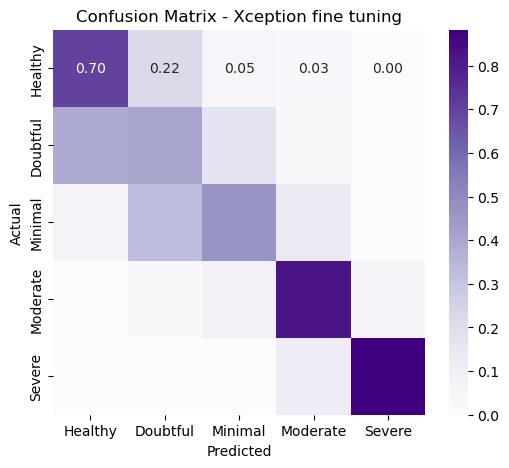

In [209]:
compute_confusion_matrix(
    predictions_xception,
    test_generator,
    class_names,
    f"{model_name} fine tuning",
)

In [40]:
import tensorflow as tf
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from matplotlib import cm


In [41]:
model = tf.keras.models.load_model("models/model_Xception_ft.hdf5", compile=False)


In [42]:
base = model.get_layer("xception")

for layer in reversed(base.layers):
    if isinstance(layer, tf.keras.layers.Conv2D):
        last_conv = layer
        break

gap_layer = model.get_layer("global_average_pooling2d_5")
drop_layer = model.get_layer("dropout_5")
dense_layer = model.get_layer("dense_5")

x = gap_layer(base.output)
x = drop_layer(x)
preds = dense_layer(x)

grad_model = tf.keras.models.Model(
    inputs=base.input,
    outputs=[last_conv.output, preds]
)


In [43]:
def make_gradcam_heatmap(grad_model, img_array, pred_index=None):
    img_array = tf.cast(img_array, tf.float32)
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array, training=False)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0) / (tf.reduce_max(heatmap) + 1e-10)
    return heatmap.numpy()


In [44]:
def overlay_gradcam(original_rgb, heatmap, alpha=0.40):
    heatmap_resized = cv2.resize(heatmap, (original_rgb.shape[1], original_rgb.shape[0]))
    heatmap_uint8 = np.uint8(255 * heatmap_resized)

    heatmap_color = cv2.applyColorMap(heatmap_uint8, cv2.COLORMAP_JET)
    heatmap_color = cv2.cvtColor(heatmap_color, cv2.COLOR_BGR2RGB)

    overlay = cv2.addWeighted(original_rgb.astype("uint8"), 1 - alpha,
                              heatmap_color.astype("uint8"), alpha, 0)
    return overlay


In [45]:
def get_test_samples(test_path, class_names, samples=6):
    data = {}
    for i, cls in enumerate(class_names):
        folder = os.path.join(test_path, str(i))
        imgs = [f for f in os.listdir(folder) if f.lower().endswith((".png",".jpg",".jpeg"))]
        data[i] = imgs[:samples]
    return data

tests_data = get_test_samples(test_path, class_names, samples=6)



Test data - Healthy


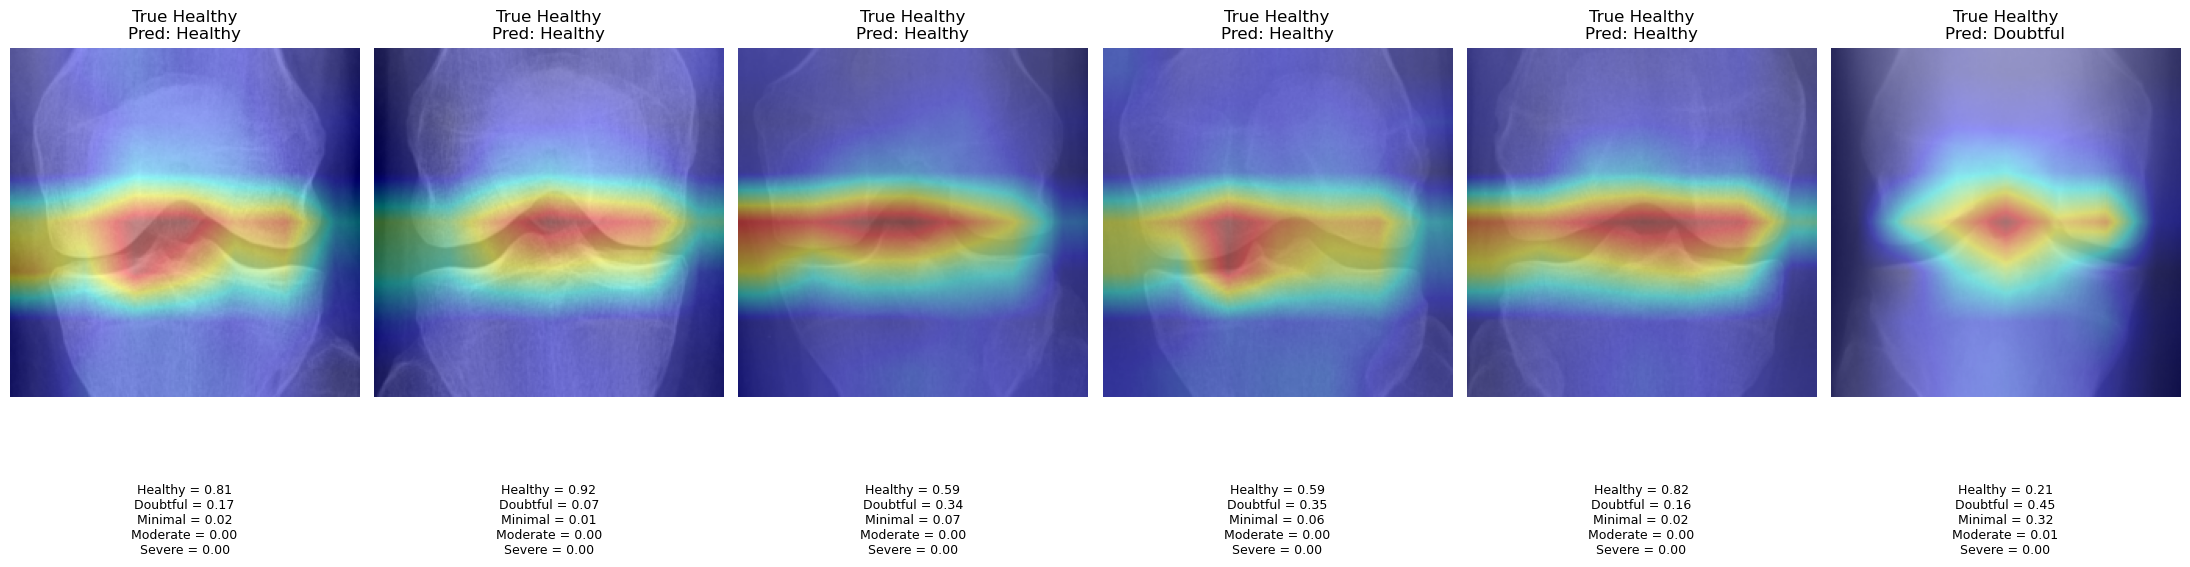


Test data - Doubtful


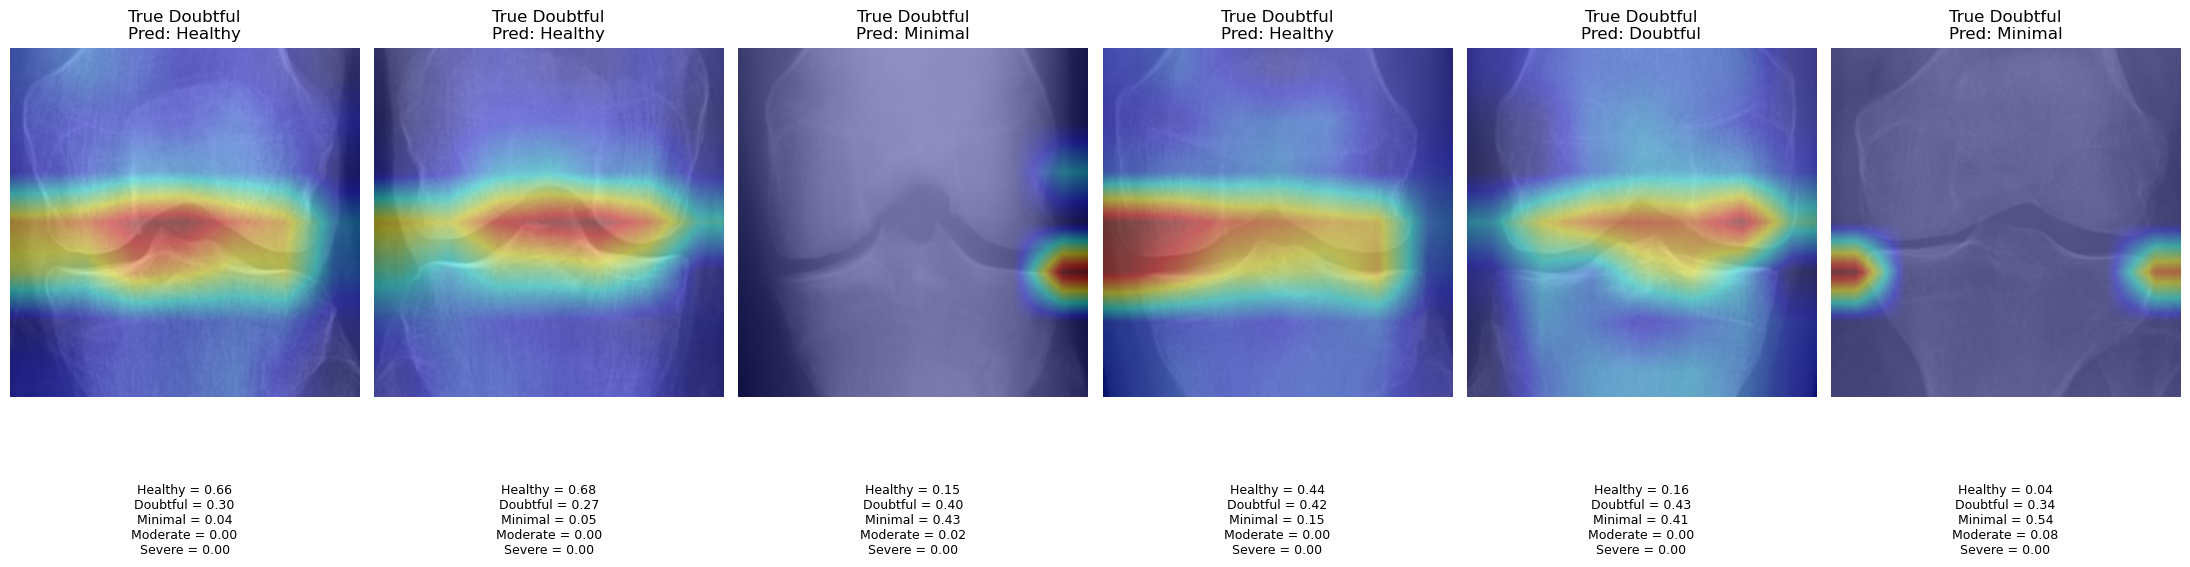


Test data - Minimal


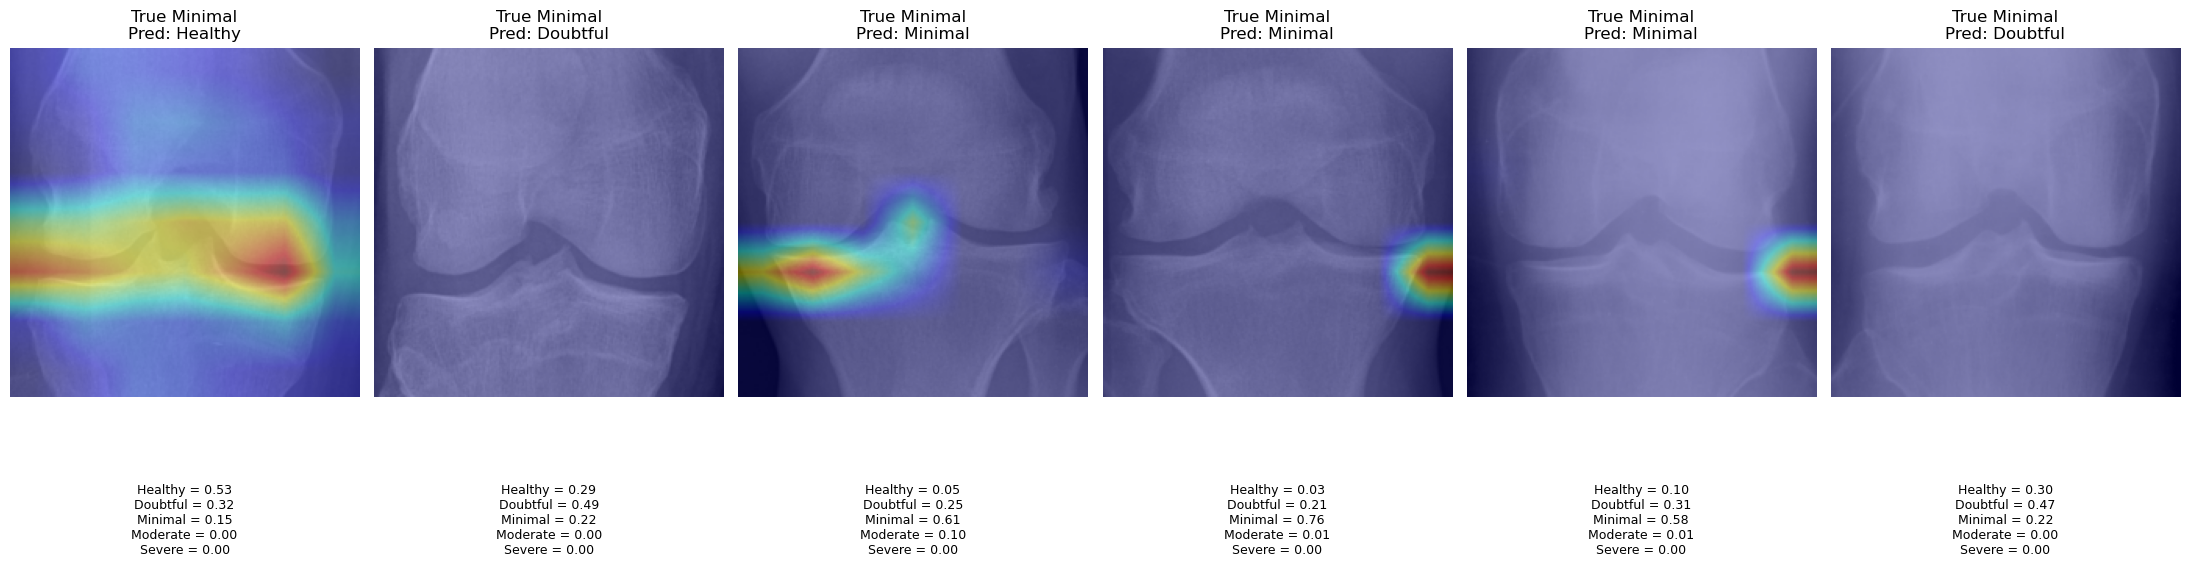


Test data - Moderate


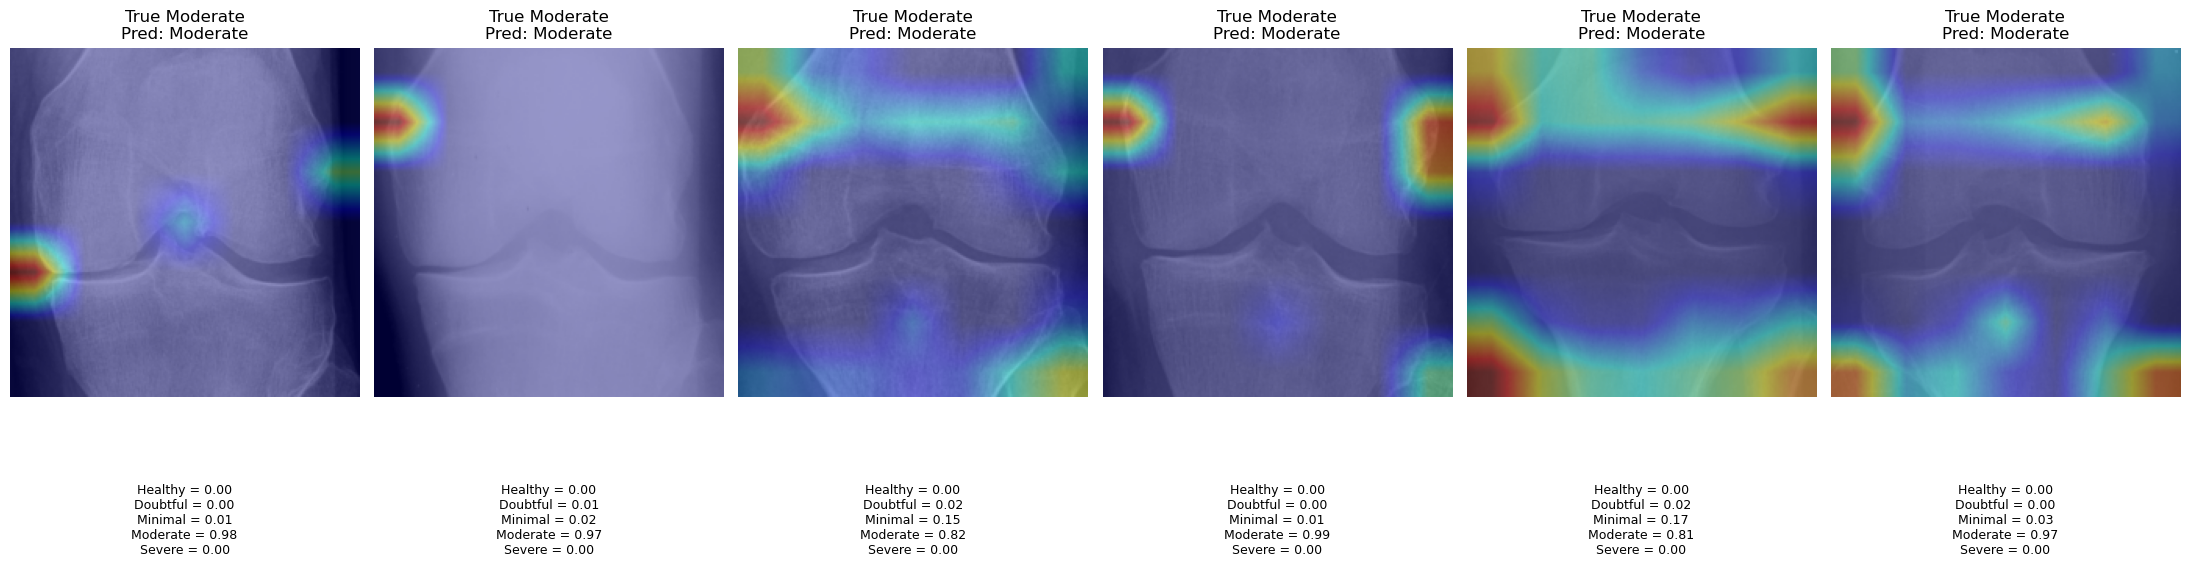


Test data - Severe


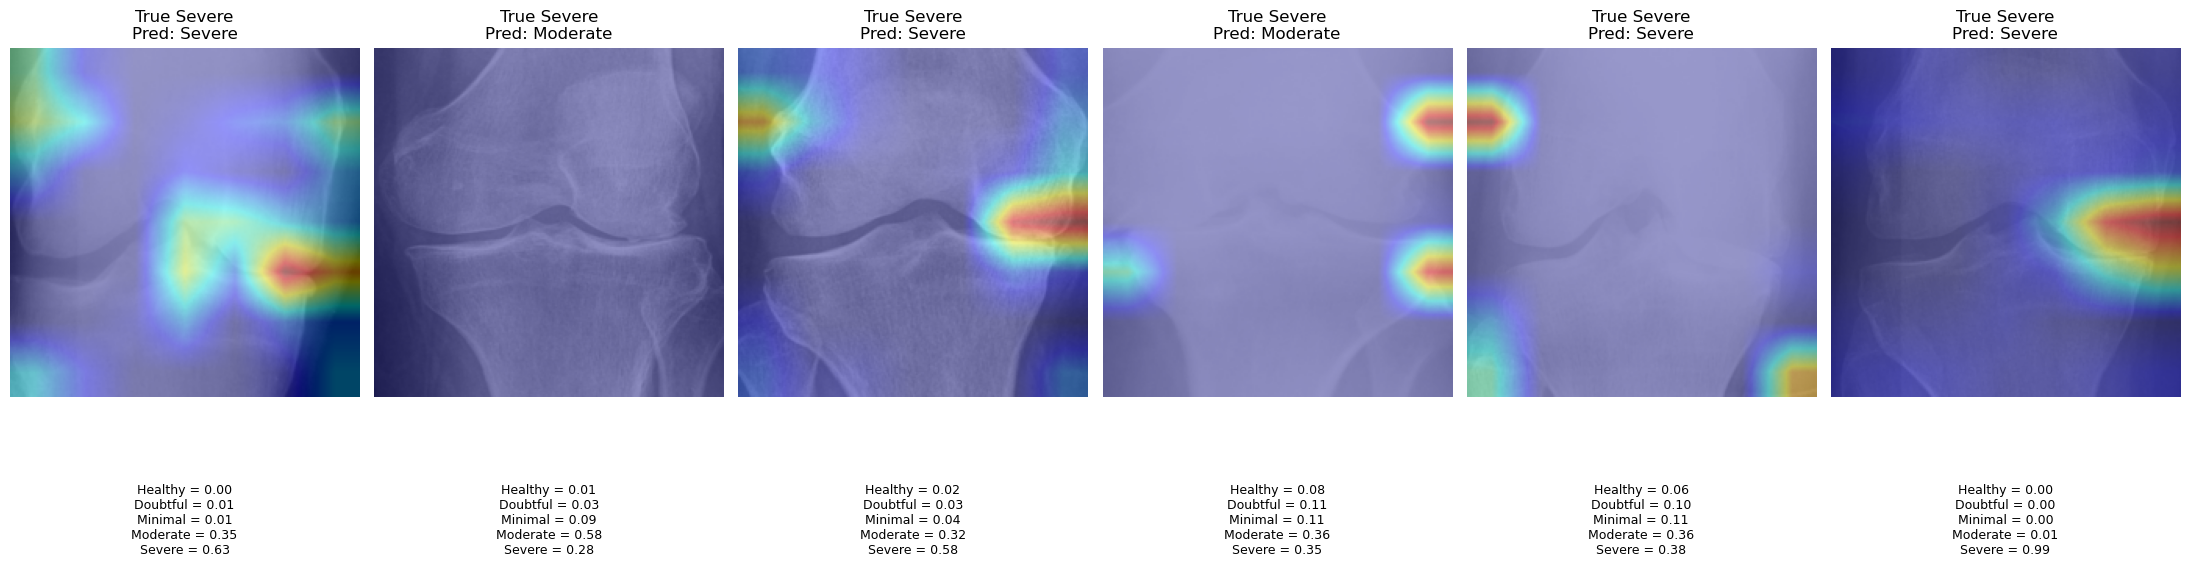

In [48]:
for k, v in tests_data.items():
    print(f"\nTest data - {class_names[k]}")
    plt.figure(figsize=(22, 10))

    for i in range(6):
        img_path = os.path.join(test_path, str(k), v[i])

        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (224, 224))
        img_rgb = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

        inp = np.expand_dims(img_rgb.astype("float32"), axis=0)
        inp = tf.keras.applications.xception.preprocess_input(inp)

        y_pred = model.predict(inp, verbose=0)[0]
        pred_label = class_names[np.argmax(y_pred)]

        heatmap = make_gradcam_heatmap(grad_model, inp)
        overlay = overlay_gradcam(img_rgb, heatmap)

        ax = plt.subplot(1, 6, i+1)
        ax.imshow(overlay)
        ax.axis("off")
        ax.set_title(f"True {class_names[k]}\nPred: {pred_label}")

        prob_text = "\n".join([f"{c} = {p:.2f}" for c, p in zip(class_names, y_pred)])
        ax.text(0.5, -0.25, prob_text, ha="center", va="top", fontsize=9, transform=ax.transAxes)

    plt.tight_layout()
    plt.show()
